In [2]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.x(0) # "x" is a "not" gate. It flips the value. Starting value is a 0, so this flips to a 1. 
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.measure([0,1], [0,1])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1
circuit.draw()  # text-based visualization. (pretty cool ...actually! Nice job whoever did this.)

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

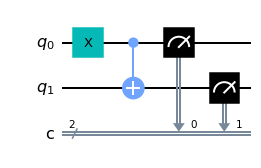

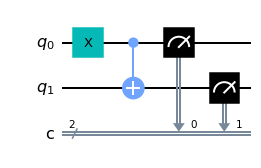

In [3]:
circuit.draw(output="mpl")  # matplotlib-based visualization.

In [4]:
from qiskit import IBMQ

IBMQ.save_account(open("token.txt","r").read())

configrc.store_credentials:WARNING:2021-06-12 23:42:29,011: Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [7]:
provider = IBMQ.get_provider("ibm-q")

In [8]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 2 queued and simulated qubits
ibmqx2 has 716 queued and 5 qubits
ibmq_16_melbourne has 37 queued and 15 qubits
ibmq_armonk has 0 queued and 1 qubits
ibmq_athens has 11 queued and 5 qubits
ibmq_santiago has 23 queued and 5 qubits
ibmq_lima has 30 queued and 5 qubits
ibmq_belem has 6 queued and 5 qubits
ibmq_quito has 8 queued and 5 qubits
simulator_statevector has 1 queued and simulated qubits
simulator_mps has 1 queued and simulated qubits
simulator_extended_stabilizer has 1 queued and simulated qubits
simulator_stabilizer has 1 queued and simulated qubits
ibmq_manila has 5 queued and 5 qubits


In [8]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_quito")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


In [1]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background") # I am using dark mode notebook, so I use this to see the chart.

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

NameError: name 'job' is not defined